# 1. Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from imblearn import under_sampling, over_sampling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 2. Load Dataset

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation:
- Wrong type for `TotalCharges` 
- There is no missing value but we must to change it first

## Make Copy Data Frame 

In [4]:
# Dropping the customer ID column because there is no reason to use it
df_copy=df.drop(columns='customerID')
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Data Preprocessing

## Duplicate Data 

In [5]:
df_copy.duplicated().sum()

22

- There are 5 duplicated rows in data copy

In [6]:
df.duplicated().sum()

0

- In Original Data there are not duplicated data
- We can assume that is dropping the customer ID column is the cause
- So let it the duplicate data

## Change Data Type

In [7]:
df_copy[df_copy['TotalCharges'].isin([' '])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df_copy['TotalCharges']= pd.to_numeric(df_copy['TotalCharges'], errors='coerce')

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Missing Value Handle 

In [10]:
df_copy.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Note:
- Data has been changed
- There are 11 missing value in TotalCharges

In [11]:
df_copy=df_copy.dropna()
df_copy.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Data Grouping 

In [13]:
categorical = df_copy.drop(columns=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'])
categorical = list(categorical.columns)
numericals = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

## Label Encoding 

The reason why I choose Label Encoding for all data is that I think there is no hierarchy in any features

In [14]:
df_copy[categorical].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [15]:
# Make new Variabels for Encoding
categorical_encoding = df_copy[categorical]

In [16]:
le = preprocessing.LabelEncoder()
for columns in categorical_encoding:
    le.fit(categorical_encoding[columns])
    categorical_encoding[columns] = le.transform(categorical_encoding[columns])

In [17]:
categorical_encoding.head(10)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
5,0,0,0,1,2,1,0,0,2,0,2,2,0,1,2,1
6,1,0,1,1,2,1,0,2,0,0,2,0,0,1,1,0
7,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3,0
8,0,1,0,1,2,1,0,0,2,2,2,2,0,1,2,1
9,1,0,1,1,0,0,2,2,0,0,0,0,1,0,0,0


In [18]:
df_copy[categorical].head(10)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
5,Female,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
6,Male,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No
7,Female,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,No
8,Female,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
9,Male,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),No


Results:
- gender = Male(1), Female(0)
- Partner = Yes(1), No(0)
- Dependents = Yes(1), No(0)
- PhoneService = Yes(1), No(0)
- MultipleLines = Yes(2), No phone service(1), No(0)
- InternetService = No(2), Fiber optic(1), DSL(0)
- OnlineSecurity = Yes(2), No internet service(1), No(0)
- OnlineBackup = Yes(2), No internet service(1), No(0)
- DeviceProtection = Yes(2), No internet service(1), No(0)
- TechSupport = Yes(2), No internet service(1), No(0)
- StreamingTV = Yes(2), No internet service(1), No(0)
- StreamingMovies = Yes(2), No internet service(1), No(0)
- Contract = One year(2), Two year(1), Month-to-month(0)
- PaperlessBilling = Yes(1), No(0)
- PaymentMethod = Mailed check(3), Electronic check	(2), Credit card(1), Bank transfer(0)
- Churn = Yes(1), No(0)

In [19]:
df_copy[categorical]=categorical_encoding
df_updated = df_copy
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int32  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int32  
 3   Dependents        7032 non-null   int32  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int32  
 6   MultipleLines     7032 non-null   int32  
 7   InternetService   7032 non-null   int32  
 8   OnlineSecurity    7032 non-null   int32  
 9   OnlineBackup      7032 non-null   int32  
 10  DeviceProtection  7032 non-null   int32  
 11  TechSupport       7032 non-null   int32  
 12  StreamingTV       7032 non-null   int32  
 13  StreamingMovies   7032 non-null   int32  
 14  Contract          7032 non-null   int32  
 15  PaperlessBilling  7032 non-null   int32  
 16  PaymentMethod     7032 non-null   int32  


In [20]:
df_updated.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Note:
- All data already have been numeric

## Outlier Handling

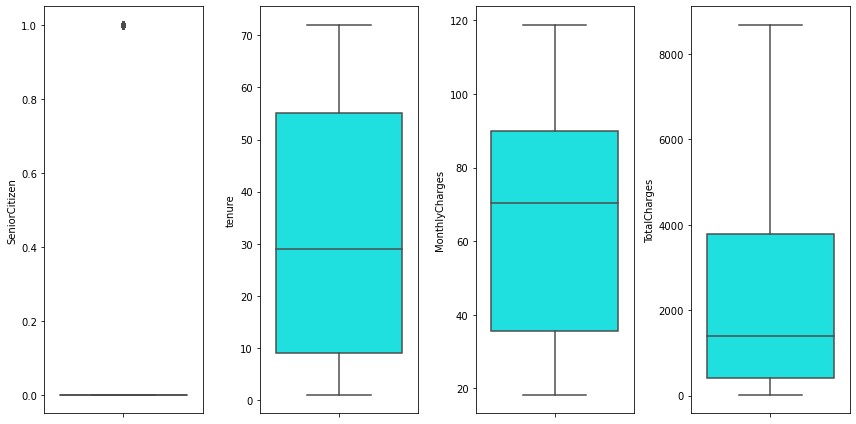

In [21]:
features = numericals

plt.figure(figsize=(12,6))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_copy[features[i]], color='cyan')
    plt.tight_layout()

Observation:
- There is no outlier

## Feature Corellation to Target  

<AxesSubplot:>

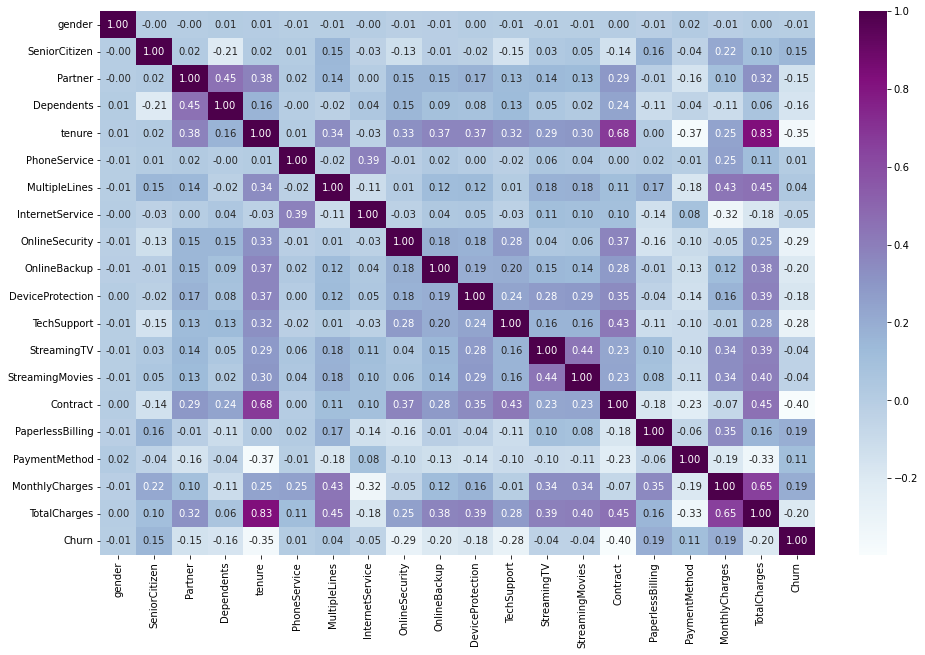

In [22]:
corr_= df_updated.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Observation:
- There are no features that are highly correlated with the target atleast 0.60 point
- Features that have a high correlation with the target is Contract 0.40 and tenure 0.35

## Imbalanced Data handling

In [23]:
# Target and Features 
y = df_updated['Churn']
X = df_updated.drop(['Churn'],axis=1)

In [24]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [25]:
# Oversampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

In [26]:
df_updated2 = pd.concat([X_over_smote, y_over_smote], axis=1)
df_updated2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [27]:
df_updated2['Churn'].value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [28]:
df_updated2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10326 entries, 0 to 10325
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10326 non-null  int32  
 1   SeniorCitizen     10326 non-null  int64  
 2   Partner           10326 non-null  int32  
 3   Dependents        10326 non-null  int32  
 4   tenure            10326 non-null  int64  
 5   PhoneService      10326 non-null  int32  
 6   MultipleLines     10326 non-null  int32  
 7   InternetService   10326 non-null  int32  
 8   OnlineSecurity    10326 non-null  int32  
 9   OnlineBackup      10326 non-null  int32  
 10  DeviceProtection  10326 non-null  int32  
 11  TechSupport       10326 non-null  int32  
 12  StreamingTV       10326 non-null  int32  
 13  StreamingMovies   10326 non-null  int32  
 14  Contract          10326 non-null  int32  
 15  PaperlessBilling  10326 non-null  int32  
 16  PaymentMethod     10326 non-null  int32 

- Data looks good and ready for modeling

# Base Line 

## Data Preprocessing 

In [29]:
y_base = df_copy['Churn']
X_base = df_copy.drop(columns='Churn')

In [30]:
X_base

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


## Scaling 

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_base)
X_base_std = scaler.transform(X_base)

## Split Data

In [32]:
X_base_train,X_base_test,y_base_train,y_base_test = train_test_split(X_base_std,y_base,test_size=0.3,random_state=42)

## Model Machine Learning 

### KNN

In [33]:
knn = KNeighborsClassifier()
knn.fit(X_base_train, y_base_train)

KNeighborsClassifier()

### Logistic Regression

In [34]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_base_train, y_base_train)

LogisticRegression(random_state=42)

### Decission Tree

In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_base_train,y_base_train)

DecisionTreeClassifier(random_state=42)

### Random Forest Imbalance 

In [36]:
model = RandomForestClassifier(random_state=42)
model.fit(X_base_train, y_base_train)
preds = model.predict(X_base_test)

## Evaluation 

### KNN 

In [37]:
y_pred_knn = knn.predict(X_base_test)
print(y_pred_knn)
print('Accuracy',accuracy_score(y_base_test, y_pred_knn))

[0 0 1 ... 0 0 0]
Accuracy 0.7431279620853081


Note:
- The Base Line has 74% Accuracy, which means it is a proper model

### Logistic Regression 

In [38]:
y_pred_reg = logreg.predict(X_base_test)
print(y_pred_reg)
print('Accuracy',accuracy_score(y_base_test, y_pred_reg))

[0 0 1 ... 0 0 0]
Accuracy 0.7990521327014218


Note:
- The Base Line has 82% Accuracy, which means it is a wonderful model

### Decission Tree

In [39]:
y_pred_dt = dt.predict(X_base_test)
print(y_pred_dt)
print('Accuracy',accuracy_score(y_base_test, y_pred_dt))

[0 0 1 ... 0 0 0]
Accuracy 0.7137440758293839


Note:
- The Base Line has 73% Accuracy, which means it is a proper model

### Random Foreset Imbalance

#### AUC

In [40]:
cm = confusion_matrix(y_base_test, preds)
print(cm)
print('AUC ',roc_auc_score(y_base_test, preds))

[[1386  163]
 [ 288  273]]
AUC  0.6907009179632884


Note:
- The Base Line has 68% Accuracy, which means it is a poor model

#### Accuracy 

In [41]:
print(preds)
print('Accuracy',accuracy_score(y_base_test, preds))

[0 0 1 ... 0 0 0]
Accuracy 0.7862559241706161


Note:
- The Base Line has 78% Accuracy, which means it is proper model

# 4. Modeling The Data 

## Data Split 

In [42]:
y = df_updated2['Churn']
X = df_updated2.drop(columns='Churn')

In [43]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.3,random_state=42)

## KNN Machine Learning Model 

### KNN

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Logistic Regression

In [46]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Decission Tree

In [47]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

### Random Forest

In [48]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
true_pred = model.predict(X_test)

## 5. Evaluation 

### KNN 

In [49]:
y_pred_knn_true = knn.predict(X_test)
print(y_pred_knn_true)
print('Accuracy of KNN Model: ',accuracy_score(y_test, y_pred_knn_true))

[1 0 0 ... 1 1 0]
Accuracy of KNN Model:  0.7872821174951582


Note:
- The Base Line has 75% Accuracy
- True accuracy model has 78% Accuracy, increasing by 4% it is a excelent result

### Logistic Regression 

In [50]:
y_pred_reg_true = logreg.predict(X_test)
print(y_pred_reg_true)
print('Accuracy of Logistic Regression Model: ',accuracy_score(y_test, y_pred_reg_true))

[1 0 0 ... 0 1 0]
Accuracy of Logistic Regression Model:  0.8008392511297612


Note:
- The Base Line has 82% Accuracy
- True accuracy model has 80% Accuracy, decreasing by 2% it is good result

### Decission Tree

In [51]:
y_pred_dt_true = dt.predict(X_test)
print(y_pred_dt_true)
print('Accuracy of Decission Tree Model: ',accuracy_score(y_test, y_pred_dt_true))

[1 0 0 ... 1 0 0]
Accuracy of Decission Tree Model:  0.7876049063912202


Note:
- The Base Line has 73% Accuracy
- True accuracy model has 78% Accuracy, increasing by 5% it is a excelent result

### Random Foreset

#### AUC 

In [52]:
cm = confusion_matrix(y_test, true_pred)
print(cm)
print('AUC Accuracy of Random Forest Model',roc_auc_score(y_test, true_pred))

[[1477   86]
 [ 864  671]]
AUC Accuracy of Random Forest Model 0.6910555788271532


Note:
- The Base Line has 68% Accuracy
- True AUC accuracy model has 67% Accuracy, decreasing by 1% it is a poor result

#### Accuracy 

In [53]:
print(true_pred)
print('Accuracy of Random Forest Model: ',accuracy_score(y_test, true_pred))

[1 0 0 ... 0 0 0]
Accuracy of Random Forest Model:  0.6933505487411233


Note:
- The Base Line has 78% Accuracy
- True Accuracy model has 68%, decreasing 10% it is a poor result 

# Conclution 

From 4 models which have been modelled, the best one is the Logistic Regression Machine Learning Model